<a href="https://colab.research.google.com/github/MananParekh17/Internship/blob/main/Cognifyz_task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data=pd.read_csv('/content/drive/MyDrive/Dataset.csv')

Mounted at /content/drive


In [ ]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Restaurant distribution on World Map

<ipython-input-4-196922125665>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


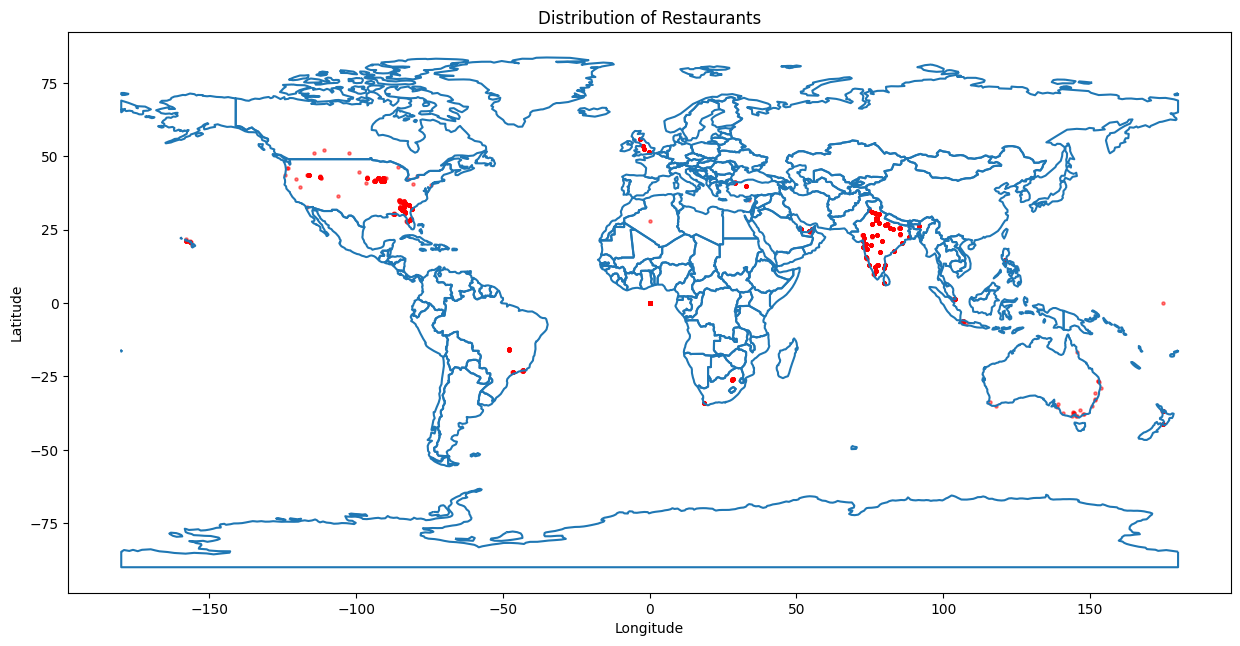

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the distribution of restaurants on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
geo_df.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Grouping the restaurants by City

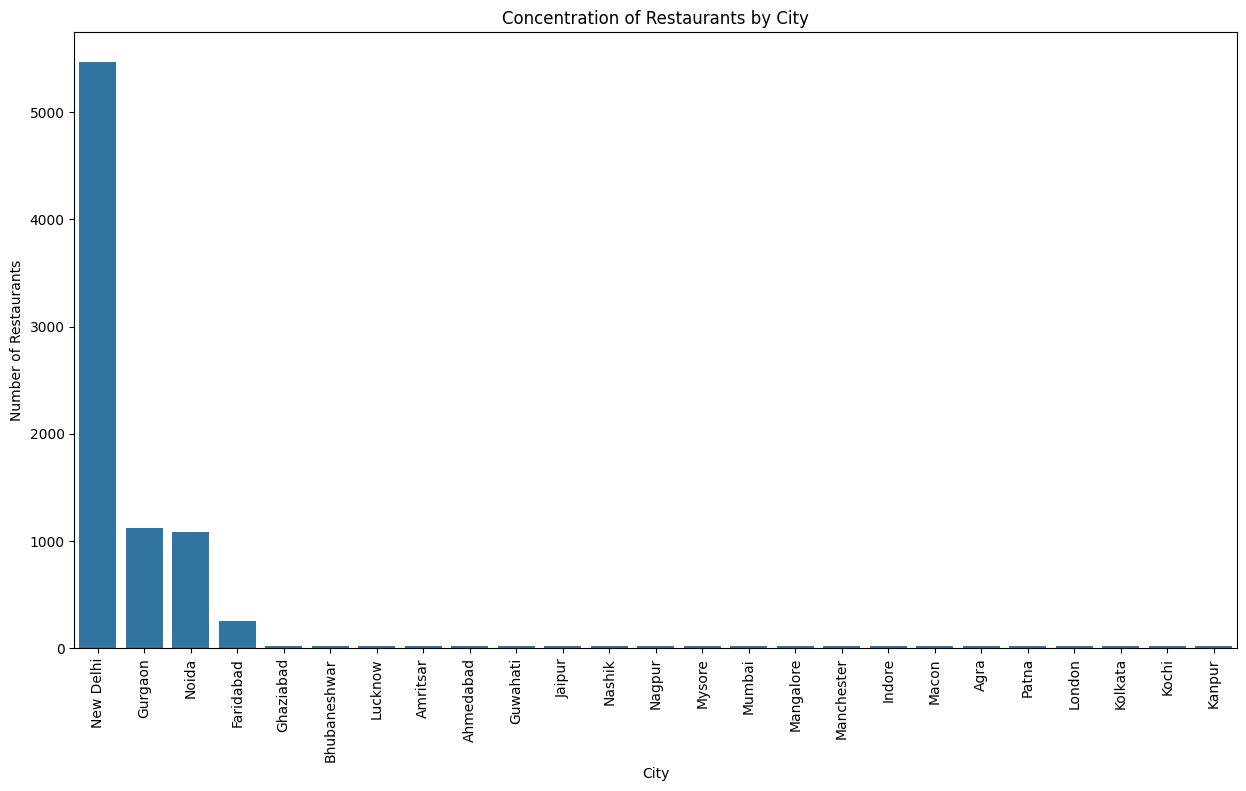

In [ ]:
# Group by city or locality
city_group = data.groupby('City').size().reset_index(name='count')

# Visualize the concentration of restaurants in different cities
plt.figure(figsize=(15, 8))
sns.barplot(x='City', y='count', data=city_group.sort_values('count', ascending=False).head(25))
plt.xticks(rotation=90)
plt.title('Concentration of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()


# Calculating stats by City

In [ ]:

# Example exchange rates to USD
exchange_rates = {
    'Botswana Pula(P)': 0.075,
    'Indian Rupee(Rs.)': 0.012,
    'Pounds(£)': 1.31,
    'Brazilian Real(R$)': 0.19,
    'Dollar($)': 1.0,
    'Emirati Diram(AED)': 0.27,
    'Turkish Lira(TL)': 0.035,
    'Australian Dollar(A$)': 0.75,
    'Canadian Dollar(C$)': 0.79,
    'Indonesian Rupiah(IDR)': 0.000067,
    'New Zealand Dollar(NZ$)': 0.71,
    'Rand(R)': 0.069,
    'Philippine Peso(P)': 0.018,
    'Qatari Rial(QR)': 0.27,
    'Sri Lankan Rupee(LKR)': 0.0051
}

# Convert price range to USD
data['Price range USD'] = data.apply(lambda row: row['Price range'] * exchange_rates.get(row['Currency'], 1), axis=1)

# Create a separate column for cuisines exploded
data['Cuisines List'] = data['Cuisines'].str.split(', ')
cuisines_exploded = data.explode('Cuisines List')

# Calculate average ratings, handle cuisines as individual entries, and convert price range to USD
def get_mode(series):
    mode = series.mode()
    if mode.empty:
        return np.nan
    else:
        return mode.iloc[0]

city_stats = data.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range USD': 'mean'
}).reset_index()

# Find the most common cuisine per city
cuisine_mode = cuisines_exploded.groupby('City')['Cuisines List'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
city_stats = city_stats.merge(cuisine_mode, on='City', how='left')

# Display the city statistics
city_stats = city_stats.rename(columns={'Aggregate rating': 'Average Rating', 'Price range USD': 'Average Price Range (USD)', 'Cuisines List': 'Most Common Cuisine'})

print(city_stats)


                City  Average Rating  Average Price Range (USD)  \
0          Abu Dhabi        4.300000                   0.891000   
1               Agra        3.965000                   2.650000   
2          Ahmedabad        4.161905                   2.571429   
3             Albany        3.555000                   1.700000   
4          Allahabad        3.395000                   2.650000   
..               ...             ...                        ...   
136          Weirton        3.900000                   2.000000   
137  Wellington City        4.250000                   3.250000   
138   Winchester Bay        3.200000                   2.000000   
139          Yorkton        3.300000                   2.000000   
140        ��stanbul        4.292857                   0.100000   

    Most Common Cuisine  
0                Indian  
1          North Indian  
2           Continental  
3              American  
4          North Indian  
..                  ...  
136          

# Insights related to location of restaurants

In [ ]:
# Group by city and count the number of restaurants
city_concentration = data['City'].value_counts().reset_index()
city_concentration.columns = ['City', 'Number of Restaurants']

# Top 10 cities with the highest concentration of restaurants
top_cities = city_concentration.head(10)
top_cities


,City,Number of Restaurants
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Bhubaneshwar,21
6,Amritsar,21
7,Ahmedabad,21
8,Lucknow,21
9,Guwahati,21


In [ ]:
# Group by City and calculate the number of restaurants and average rating
city_group = data.groupby('City').agg(
    num_restaurants=('Restaurant ID', 'count'),
    avg_rating=('Aggregate rating', 'mean')
).reset_index()

# Sort by number of restaurants
city_group_sorted = city_group.sort_values(by='num_restaurants', ascending=False)

city_group_sorted.head(10)


,City,num_restaurants,avg_rating
88,New Delhi,5473,2.438845
50,Gurgaon,1118,2.651431
89,Noida,1080,2.036204
43,Faridabad,251,1.866932
48,Ghaziabad,25,2.852000
17,Bhubaneshwar,21,3.980952
69,Lucknow,21,4.195238
5,Amritsar,21,3.685714
2,Ahmedabad,21,4.161905
51,Guwahati,21,4.190476


In [ ]:
# Group by city and calculate the average rating and number of restaurants
city_ratings_restaurants = data.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    num_restaurants=('Restaurant ID', 'count')
).reset_index()

# Display the top 10 cities with the highest average ratings
top_rated_cities = city_ratings_restaurants.sort_values('avg_rating', ascending=False).head(10)
top_rated_cities


,City,avg_rating,num_restaurants
56,Inner City,4.900000,2
107,Quezon City,4.800000,1
73,Makati City,4.650000,2
95,Pasig City,4.633333,3
75,Mandaluyong City,4.625000,4
15,Beechworth,4.600000,1
67,London,4.535000,20
123,Taguig City,4.525000,4
122,Tagaytay City,4.500000,1
116,Secunderabad,4.500000,2


In [ ]:
# Group by city and calculate the average price range in USD
avg_price_range = data.groupby('City')['Price range USD'].mean().reset_index()
avg_price_range.columns = ['City', 'Average Price Range (USD)']

# Display the top 10 cities with the highest average price range
top_price_cities = avg_price_range.sort_values('Average Price Range (USD)', ascending=False).head(10)
top_price_cities


,City,Average Price Range (USD)
93,Panchkula,4.00
97,Paynesville,4.00
133,Vineland Station,4.00
104,Princeton,4.00
118,Singapore,3.65
49,Goa,3.65
137,Wellington City,3.25
9,Auckland,3.05
35,Dehradun,3.05
79,Middleton Beach,3.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


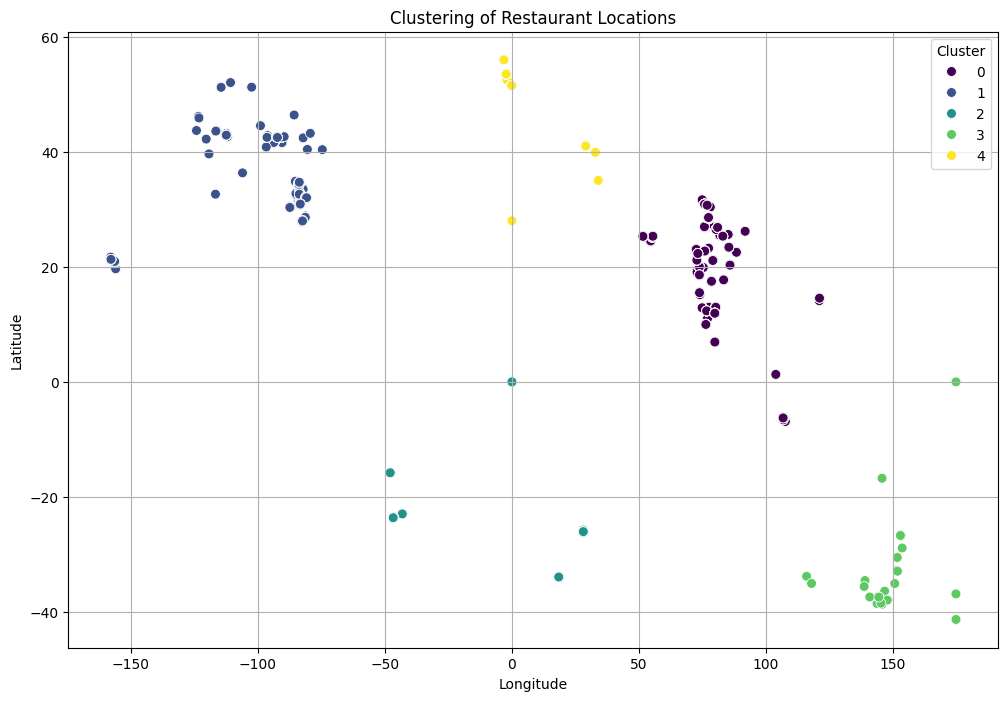

In [ ]:
from sklearn.cluster import KMeans

# Extract latitude and longitude for clustering
location_data = data[['Latitude', 'Longitude']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(location_data)

# Plot clusters on a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', palette='viridis', data=data, legend='full', s=50)
plt.title('Clustering of Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
